# encoder, decoder 각각 1개의 layer 추가
## encoder layer, 중앙 hidden layer, decoder layer에서 각각 256, 128, 256개의 노드 수를 갖는 모델

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
learning_rate = 0.01
total_epoch = 20
batch_size = 100
n_hidden = 128
n_input = 28 * 28

In [3]:
X = tf.placeholder(tf.float32, [None, n_input])

In [5]:
W_encode1 = tf.Variable(tf.random_normal([n_input, 256]))
b_encode1 = tf.Variable(tf.random_normal([256]))
encoder1 = tf.nn.sigmoid(tf.add(tf.matmul(X, W_encode1), b_encode1))

In [7]:
W_encode2 = tf.Variable(tf.random_normal([256, n_hidden]))
b_encode2 = tf.Variable(tf.random_normal([n_hidden]))
encoder2 = tf.nn.sigmoid(tf.add(tf.matmul(encoder1, W_encode2), b_encode2))

In [8]:
W_decode1 = tf.Variable(tf.random_normal([n_hidden, 256]))
b_decode1 = tf.Variable(tf.random_normal([256]))
decoder1 = tf.nn.sigmoid(tf.add(tf.matmul(encoder2, W_decode1), b_decode1))

In [9]:
W_decode2 = tf.Variable(tf.random_normal([256, n_input]))
b_decode2 = tf.Variable(tf.random_normal([n_input]))
decoder2 = tf.nn.sigmoid(tf.add(tf.matmul(decoder1, W_decode2), b_decode2))

In [11]:
cost = tf.reduce_mean(tf.pow(X-decoder2,2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(100):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch + 1), 'Avg. cost = ', '{:.4f}'.
         format(total_cost / total_batch))
    
print('최적화 완료!')

Epoch: 0001 Avg. cost =  0.0954
Epoch: 0002 Avg. cost =  0.0723
Epoch: 0003 Avg. cost =  0.0675
Epoch: 0004 Avg. cost =  0.0641
Epoch: 0005 Avg. cost =  0.0617
Epoch: 0006 Avg. cost =  0.0587
Epoch: 0007 Avg. cost =  0.0562
Epoch: 0008 Avg. cost =  0.0544
Epoch: 0009 Avg. cost =  0.0538
Epoch: 0010 Avg. cost =  0.0532
Epoch: 0011 Avg. cost =  0.0528
Epoch: 0012 Avg. cost =  0.0525
Epoch: 0013 Avg. cost =  0.0511
Epoch: 0014 Avg. cost =  0.0509
Epoch: 0015 Avg. cost =  0.0507
Epoch: 0016 Avg. cost =  0.0503
Epoch: 0017 Avg. cost =  0.0501
Epoch: 0018 Avg. cost =  0.0499
Epoch: 0019 Avg. cost =  0.0488
Epoch: 0020 Avg. cost =  0.0478
Epoch: 0021 Avg. cost =  0.0462
Epoch: 0022 Avg. cost =  0.0460
Epoch: 0023 Avg. cost =  0.0455
Epoch: 0024 Avg. cost =  0.0453
Epoch: 0025 Avg. cost =  0.0451
Epoch: 0026 Avg. cost =  0.0449
Epoch: 0027 Avg. cost =  0.0444
Epoch: 0028 Avg. cost =  0.0442
Epoch: 0029 Avg. cost =  0.0441
Epoch: 0030 Avg. cost =  0.0440
Epoch: 0031 Avg. cost =  0.0438
Epoch: 0

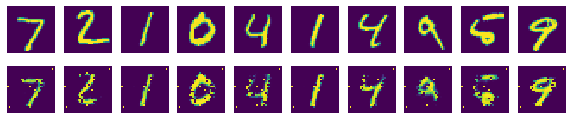

In [14]:
sample_size = 10
samples = sess.run(decoder2, feed_dict={X: mnist.test.images[:sample_size]})

fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))

for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))